In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
revenue_in_millions = [30990, 35119, 46542, 48017, 46854, 45998, 44294, 41863, 36212, 34300, 37266]
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,2019]
df = pd.DataFrame()
df['Year'] = years
df['Revenue'] = revenue_in_millions
df = df.set_index('Year')
df

,Revenue
Year,
2009,30990
2010,35119
2011,46542
2012,48017
2013,46854
2014,45998
2015,44294
2016,41863
2017,36212


C:\Users\Bakharia\miniconda3\envs\DS\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


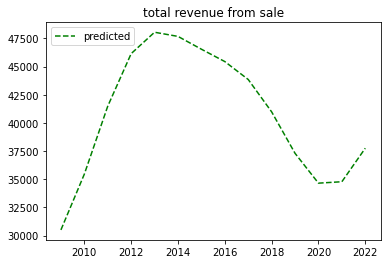

[30990.] [37746.75349736]


In [3]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = df.index.values
x = x.reshape(len(x), 1)
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = df['Revenue'].values
y = sc_y.fit_transform(y.reshape(len(y), 1))
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',gamma='auto', tol=0.001, C=10.0, epsilon=0.001)
regressor.fit(x, y)
    # plt.subplot(2,1,1)
    # plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(y)-sc_y.inverse_transform(y[0]), color = 'red', label = 'original')
    #plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
    #plt.show()
    #plt.subplot(2,1,2)
    #plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
xp = int(df.index.values[0])
xp = [x for x in range(xp,2023,1)]
xp = np.array(xp)
xp = np.reshape(xp,(-1,1))
    #sc_xp = StandardScaler()
xp = sc_x.fit_transform(xp)
plt.plot(sc_x.inverse_transform(xp), sc_y.inverse_transform(regressor.predict(xp)), color = 'green', linestyle = '--', label = 'predicted')
plt.legend(loc='upper left')
plt.title('total revenue from sale')
plt.show()
print(sc_y.inverse_transform(y[0]),sc_y.inverse_transform(regressor.predict(sc_x.transform([[2022]]))))
#temp.append(sc_y.inverse_transform(regressor.predict(sc_x.transform([[2100]]))))

In [4]:
price_of_one = 5

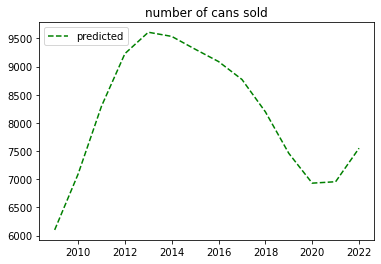

In [5]:
plt.plot(sc_x.inverse_transform(xp), sc_y.inverse_transform(regressor.predict(xp))/price_of_one, color = 'green', linestyle = '--', label = 'predicted')
plt.legend(loc='upper left')
plt.title('number of cans sold')
plt.show()

In [6]:
dfs = pd.DataFrame()
dfs['Year'] = sc_x.inverse_transform(xp).ravel()
dfs['Revenue'] = sc_y.inverse_transform(regressor.predict(xp))
dfs = dfs.sort_values(by=['Revenue'])
dfs = dfs.reset_index(drop = True)
dfs

,Year,Revenue
0,2009.0,30495.894788
1,2020.0,34646.546004
2,2021.0,34773.476159
3,2010.0,35446.173635
4,2019.0,37293.962062
5,2022.0,37746.753497
6,2018.0,40976.454689
7,2011.0,41476.564325
8,2017.0,43847.065243
9,2016.0,45438.202042


In [7]:
percentage_bottle_recycled = (1 - sc_y.inverse_transform(regressor.predict(xp))[-1]/dfs.iloc[-1,1])*100
percentage_bottle_recycled,dfs.iloc[-1,0]

(21.42823996583911, 2013.0)

In [8]:
amount_saved = percentage_bottle_recycled*max(sc_y.inverse_transform(regressor.predict(xp)))*0.26
amount_saved/1E+3

267.65352818304564

In [14]:
def amount_saved(x):
    if x > 37746.754:
        return (1 - sc_y.inverse_transform(regressor.predict(xp))[-1]/x)*x*26/1e3
    else:
        return None

In [16]:
dfs['Saved in kg'] = [amount_saved(x) for x in dfs['Revenue']]
dfs

,Year,Revenue,Saved in kg
0,2009.0,30495.894788,NaN
1,2010.0,35446.173635,NaN
2,2011.0,41476.564325,96.975082
3,2012.0,46141.728445,218.269349
4,2013.0,48041.119966,267.653528
5,2014.0,47671.987447,258.056083
6,2015.0,46535.526334,228.508094
7,2016.0,45438.202042,199.977662
8,2017.0,43847.065243,158.608105
9,2018.0,40976.454689,83.972231


In [19]:
dfs = dfs.sort_values(by=['Year'])
dfs = dfs.reset_index(drop=True)
dfs.to_csv('D:\Earth.Org\CokeRecycle\CocaCola_Plastic_Saved')